# Business Problem:

classify the Size_Categorie using SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [2]:
df=pd.read_csv('forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data=df.copy()

In [6]:
data.drop(['month','day'],axis=1,inplace=True)

In [7]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


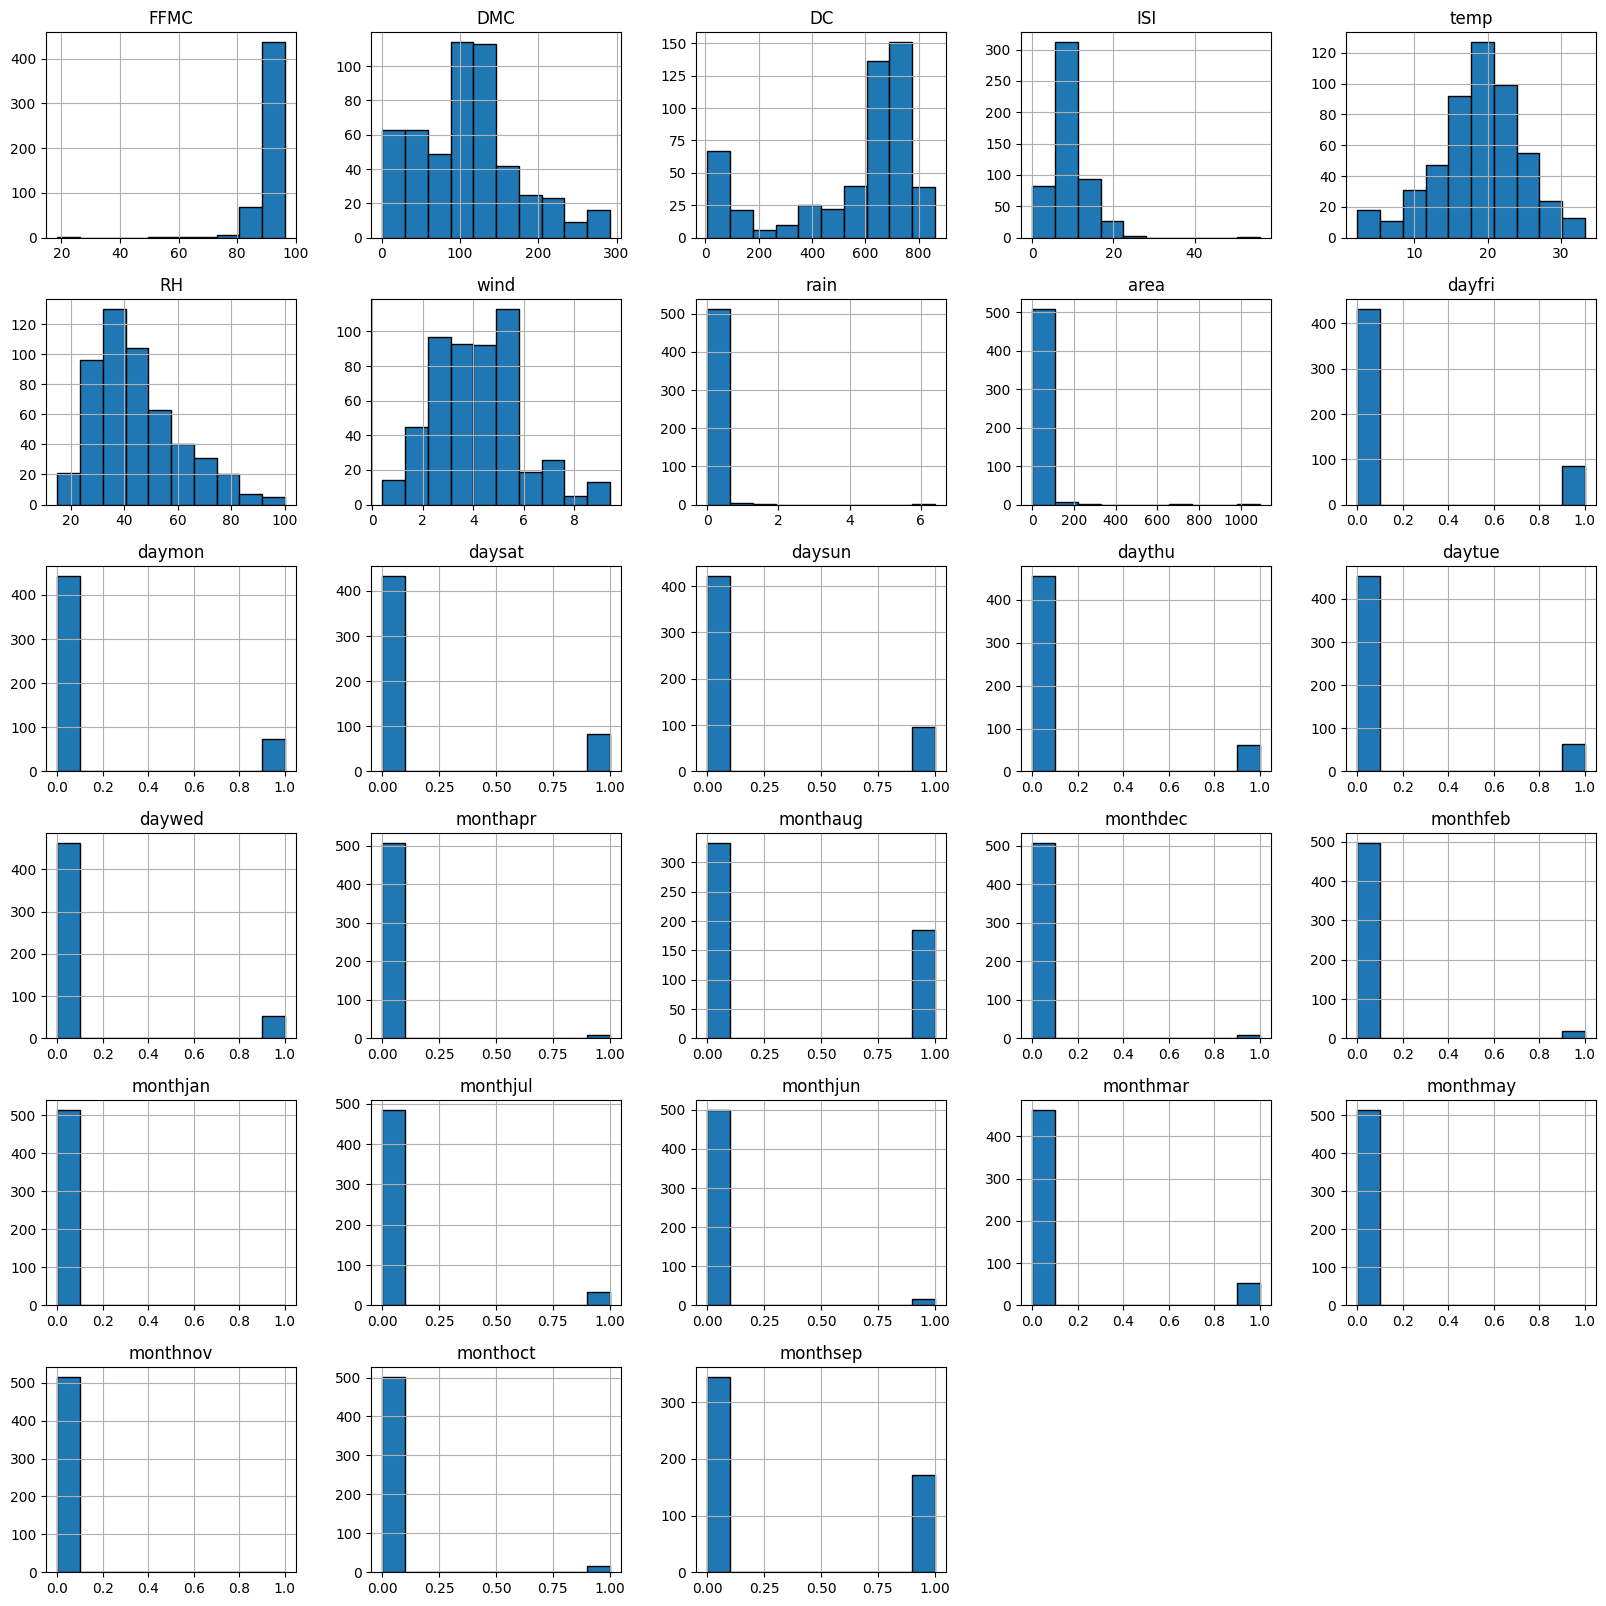

In [8]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

# Standardisation

In [9]:
data.iloc[:,0:9]=StandardScaler().fit_transform(data.iloc[:,0:9])

In [10]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
data.size_category.value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

In [12]:
le = preprocessing.LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

In [13]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


# Splitting the data to train and test

In [14]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [15]:
x.value_counts()

FFMC      DMC        DC         ISI        temp       RH         wind       rain       area       dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep
0.173229   2.149390   0.830663  -0.597503   0.260443   0.718441  -1.015466  -0.073268  -0.202020  0       0       0       0       1       0       0       0         1         0         0         0         0         0         0         0         0         0         0           2
0.064430   0.875644   0.825821  -0.421874   1.208554  -0.201709  -0.233308  -0.073268  -0.202020  1       0       0       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0           2
0.263895   0.005121   0.428365   0.126966   0.260443  -0.140366   0.492982  -0.073268  -0.202020  0       0       0       0       0       0       1       0         1      

In [16]:
y.value_counts()

size_category
1    378
0    139
Name: count, dtype: int64

In [17]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resample, y_resample = sm.fit_resample(x, y)
x_df = pd.DataFrame(x_resample)
x_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,1,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.254371,0.018825,0.908222,0.045805,0.358824,-0.185600,-0.925174,-0.073268,0.037789,1,...,0,0,0,0,0,0,0,0,0,1
752,0.657752,0.460181,0.209248,2.200579,-1.187573,2.432189,1.481037,-0.073268,0.363884,0,...,0,0,0,0,0,0,0,0,0,0
753,0.580339,0.314090,0.178109,1.675047,-1.501637,2.264860,0.499996,-0.073268,0.083787,0,...,0,0,0,0,0,0,0,0,0,0
754,0.203433,2.495988,1.061892,-0.246271,0.409846,0.094718,0.288120,-0.073268,-0.006355,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resample, y_resample = sm.fit_resample(x, y)
y_df = pd.DataFrame(y_resample)
y_df

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
751,0
752,0
753,0
754,0


In [22]:
y_df.size_category.value_counts()

size_category
1    378
0    378
Name: count, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42) 

In [26]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [27]:
gsv.best_params_ , gsv.best_score_

({'C': 14, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8659016393442622)

In [28]:
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.86842105263158


array([[61, 13],
       [10, 68]], dtype=int64)

In [29]:
# Training accuracy
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 99.33774834437085


array([[301,   3],
       [  1, 299]], dtype=int64)

# Applying PCA

In [30]:
pdata=data.copy()

In [31]:
pdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)
pca_values=pca.fit_transform(x_resample)

In [33]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([28.71, 41.57, 53.21, 63.97, 73.47, 79.75, 84.15, 87.7 , 89.76,
       91.41, 92.78, 93.97, 95.06, 96.04, 96.91, 97.67, 98.31, 98.79,
       99.08, 99.31, 99.52, 99.67, 99.8 , 99.88, 99.93, 99.95, 99.97,
       99.98])

In [34]:
x=pd.DataFrame(pca_values[:,0:15])
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.400711,0.358027,-0.911600,0.177564,-0.454447,-0.247524,-0.060133,-0.389523,0.068977,0.494481,-0.206403,-0.530228,-0.479629,-0.179611,-0.194805
1,0.228017,-1.132709,0.604415,-0.753955,1.334714,0.457056,-0.678834,0.408845,0.140864,-0.988343,-0.074809,-0.173254,-0.162095,0.650847,-0.534382
2,0.481489,-0.942444,0.649604,-0.659894,1.065319,0.391034,-0.877553,0.180870,0.423052,-0.914843,-0.408616,0.706434,-0.527214,-0.301065,-0.211889
3,2.972740,2.069694,0.134629,0.271887,-0.324948,2.299599,-0.622570,-0.081158,-0.924636,0.564827,-0.444355,-0.683236,-0.236848,-0.134076,-0.011795
4,2.533181,1.386553,1.095384,-0.140963,-0.147163,2.989457,0.018743,0.255862,-1.061376,0.481381,0.525865,0.081912,0.172012,0.048572,0.055545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-0.893004,-0.390423,0.722535,-0.364536,0.386485,0.030508,-0.818504,0.489748,-0.001949,0.341903,-0.164487,-0.530215,-0.464924,-0.253296,-0.174629
752,-0.053082,2.475472,-0.560877,0.668072,-2.510985,1.357530,-0.241332,0.671977,0.023507,-0.369747,-0.117701,0.034864,0.136247,-0.024957,0.167222
753,0.223745,2.145602,0.054211,0.249623,-1.850480,1.637849,-0.444033,0.426483,0.236066,-0.557041,-0.050423,0.015722,0.007483,-0.036016,0.090347
754,-1.806938,0.868578,0.987447,0.008604,-0.743031,-0.679311,0.842868,-1.091898,0.530877,0.052730,0.026900,-0.023888,0.009721,0.000699,-0.102587


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y_resample,test_size=0.2, random_state=0) 

In [36]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,0.1,0.01],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 0.1, 0.01],
                          'kernel': ['rbf']}])

In [37]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9436612021857924)

In [38]:
clf = SVC(C= 15,gamma = 0.1,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 93.42105263157895


array([[75,  6],
       [ 4, 67]], dtype=int64)

In [39]:
clf = SVC(C= 15,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 99.00662251655629


array([[293,   4],
       [  2, 305]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# print the classification report

print('SVM Linear Kernel Model','\n',(y_test, y_pred))

SVM Linear Kernel Model 
 (650    0
734    0
404    0
79     1
422    0
      ..
156    1
118    1
649    0
476    1
181    1
Name: size_category, Length: 152, dtype: int32, array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0